# HOMEWORK 9

In this homework, you are going to use the dlib face detector and apply it to an image of your liking. You can follow the procedure shown in lesson 9. Please always comment your code so I can see what you're doing :-)

For this homework we are not going to provide you with any code, you'll have to build the face detector on your own.

### Step 0

Run the necessary imports.

In [9]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]
import time

### Step 1

Load an image (any image that contains faces).

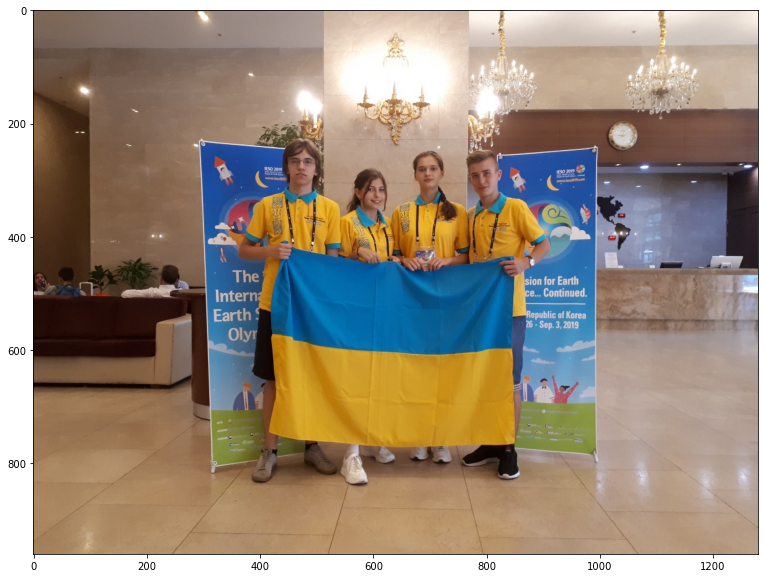

In [11]:
img = cv2.imread('data/faces.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img)

### Step 2

Load the dlib face predictor.

In [12]:
import dlib


### Step 3a

Run the predictor on your image. By the DLIB HOG + Linear SVM detector.

In [13]:

detector_hog = dlib.get_frontal_face_detector()

start = time.time();
rects_hog = detector_hog(gray, 1);
end = time.time()

print('Number of detected faces by HOG algorithm:', len(rects_hog))
print("HOG face detection time {:.4f} seconds".format(end - start))

Number of detected faces by HOG algorithm: 3
HOG face detection time 0.8798 seconds


### Step 3b

Run the predictor on your image. By the MMOD CNN detector.

In [14]:

detector_cnn = dlib.cnn_face_detection_model_v1('data/mmod_human_face_detector.dat');

start = time.time();
rects_cnn = detector_cnn(gray, 1);
end = time.time();

print('Number of detected faces by CNN algorithm:', len(rects_cnn))
print("CNN face detection time {:.4f} seconds".format(end - start))

Number of detected faces by CNN algorithm: 4
CNN face detection time 286.8998 seconds


### Step 4

Draw bounding boxes around the detected faces and plot the image. Use different colour for each face.

(<AxesSubplot:title={'center':'DLIB MMOD CNN detector'}>,
 Text(0.5, 1.0, 'DLIB MMOD CNN detector'))

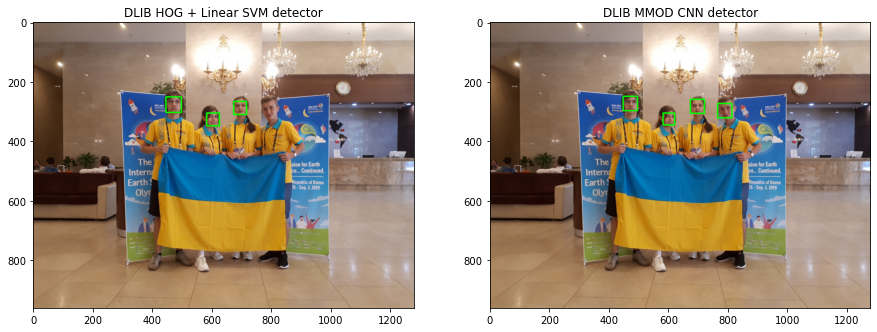

In [27]:
def rect_to_bb(rect):
    # Dlib rect --> OpenCV rect
    x = rect.left()
    y = rect.top()
    w = rect.right() - x
    h = rect.bottom() - y

    return (x, y, w, h)

result_dlib_hog = np.copy(img)
faces_dlib_img_hog = []
for rect in rects_hog:    
    # Draw rectangle around the face
    x, y, w, h = rect_to_bb(rect)
    cv2.rectangle(result_dlib_hog, (x, y), (x+w, y+h), (0, 255, 0), 3)
    faces_dlib_img_hog.append(img[y:y+h, x:x+w, :])
    
result_dlib_cnn = np.copy(img)
faces_dlib_img_cnn = []
for rect in rects_cnn:    
    # Draw rectangle around the face
    x, y, w, h = rect_to_bb(rect.rect)
    cv2.rectangle(result_dlib_cnn, (x, y), (x+w, y+h), (0, 255, 0), 3)
    faces_dlib_img_cnn.append(img[y:y+h, x:x+w, :])
    
    
#plt.subplot(121), plt.imshow(result), plt.title('Viola-Jones')
plt.subplot(121), plt.imshow(result_dlib_hog), plt.title('DLIB HOG + Linear SVM detector')
plt.subplot(122), plt.imshow(result_dlib_cnn), plt.title('DLIB MMOD CNN detector')

### Conclusions gegarding DLIB's face detection algorithm
DLIB  has a two detector for a face detection both of them works well, but.... 

The detector DLIB HOG + Linear SVM works fast but not so good. As we can see on the example above, one face was not detected, despite the fact that it's very simple face with good quality of the source image.

The detector MMOD CNN is more robust and confidently detected all faces, but it take loooot of time, abut 300 sec. it's more than 300 times than is DLIB HOG + Linear SVM detector.

### Step 5 (optional)

Repeat the process with a different and more challenging image (more faces, smaller faces, people with glasses, hats, helmets, etc.). How does the detector perform? Is it robust?

### Lot of faces

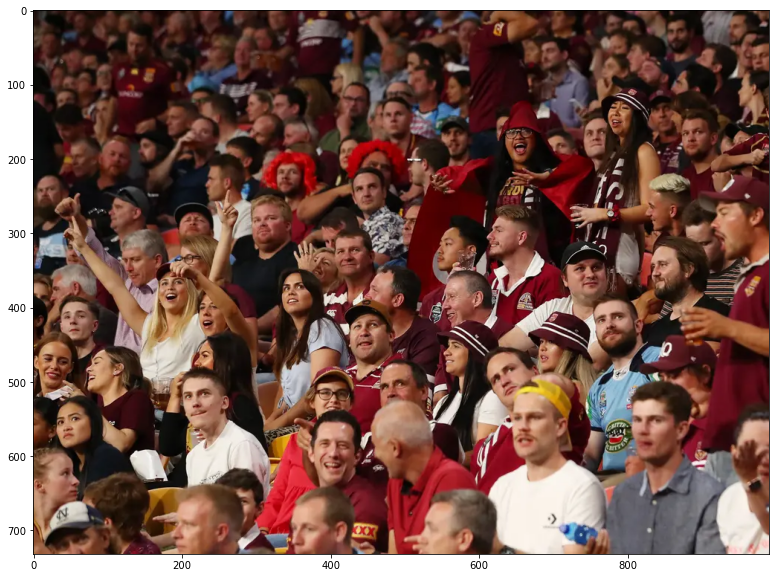

In [28]:
img = cv2.imread('data/stadiu_people.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img)

### HOG detector


Number of detected faces by HOG algorithm: 32
HOG face detection time 0.4523 seconds


(<matplotlib.image.AxesImage at 0x24156d35be0>,
 Text(0.5, 1.0, 'DLIB HOG + Linear SVM detector'))

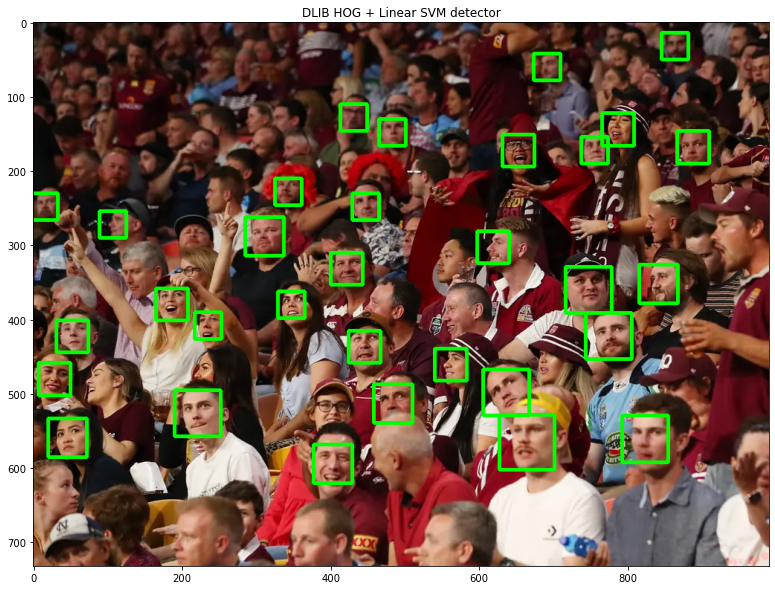

In [29]:
detector_hog = dlib.get_frontal_face_detector()

start = time.time();
rects_hog = detector_hog(gray, 1);
end = time.time()

print('Number of detected faces by HOG algorithm:', len(rects_hog))
print("HOG face detection time {:.4f} seconds".format(end - start))

result_dlib_hog = np.copy(img)
faces_dlib_img_hog = []
for rect in rects_hog:    
    # Draw rectangle around the face
    x, y, w, h = rect_to_bb(rect)
    cv2.rectangle(result_dlib_hog, (x, y), (x+w, y+h), (0, 255, 0), 3)
    faces_dlib_img_hog.append(img[y:y+h, x:x+w, :])
    
plt.imshow(result_dlib_hog), plt.title('DLIB HOG + Linear SVM detector')

### CNN detector


Number of detected faces by CNN algorithm: 50
CNN face detection time 111.2330 seconds


(<matplotlib.image.AxesImage at 0x24156da2280>,
 Text(0.5, 1.0, 'DLIB MMOD CNN detector'))

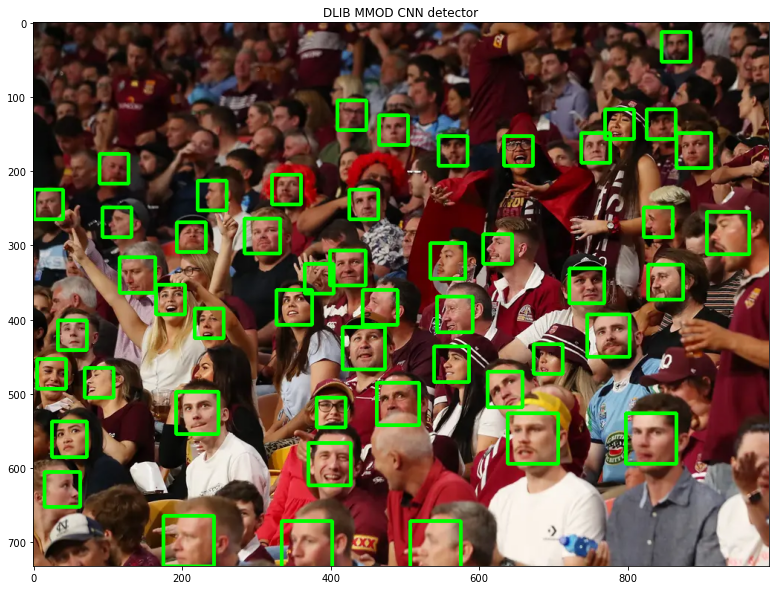

In [30]:
detector_cnn = dlib.cnn_face_detection_model_v1('data/mmod_human_face_detector.dat');

start = time.time();
rects_cnn = detector_cnn(gray, 1);
end = time.time();

print('Number of detected faces by CNN algorithm:', len(rects_cnn))
print("CNN face detection time {:.4f} seconds".format(end - start))


result_dlib_cnn = np.copy(img)
faces_dlib_img_cnn = []
for rect in rects_cnn:    
    # Draw rectangle around the face
    x, y, w, h = rect_to_bb(rect.rect)
    cv2.rectangle(result_dlib_cnn, (x, y), (x+w, y+h), (0, 255, 0), 3)
    faces_dlib_img_cnn.append(img[y:y+h, x:x+w, :])
    
    
plt.imshow(result_dlib_cnn), plt.title('DLIB MMOD CNN detector')

### Lot of faces conclusion

The CNN detector really robust detector, as we can see it detected all faces that looks as faces on the picture. The HOG detector did founde the faces that looking straight at the camera only.

## Faces in the mask


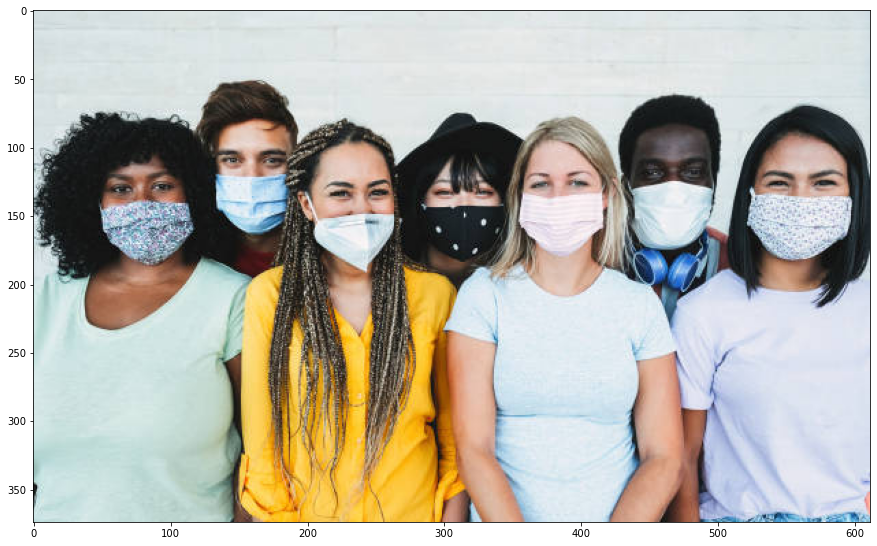

In [31]:
img = cv2.imread('data/faces_in_the_mask.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
plt.imshow(img)

### HOG detector


Number of detected faces by HOG algorithm: 4
HOG face detection time 0.1402 seconds


(<matplotlib.image.AxesImage at 0x24156eaca30>,
 Text(0.5, 1.0, 'DLIB HOG + Linear SVM detector'))

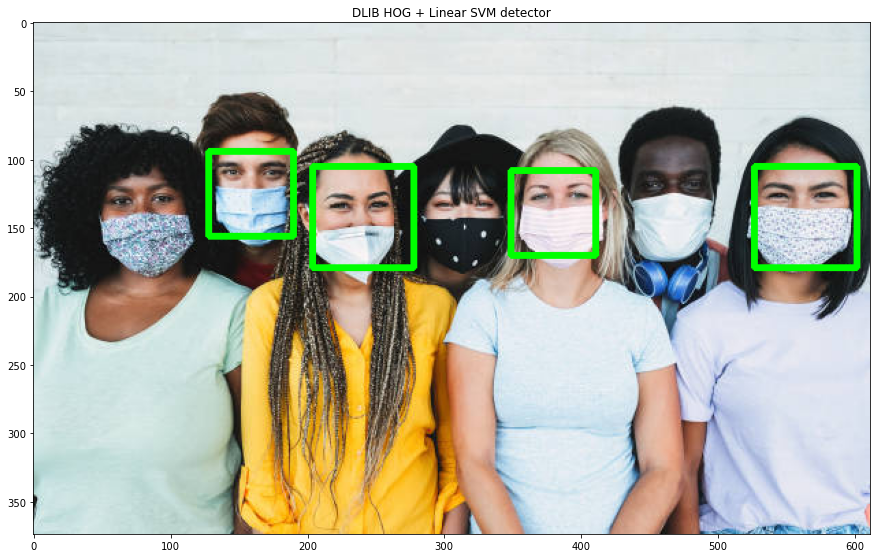

In [32]:
detector_hog = dlib.get_frontal_face_detector()

start = time.time();
rects_hog = detector_hog(gray, 1);
end = time.time()

print('Number of detected faces by HOG algorithm:', len(rects_hog))
print("HOG face detection time {:.4f} seconds".format(end - start))

result_dlib_hog = np.copy(img)
faces_dlib_img_hog = []
for rect in rects_hog:    
    # Draw rectangle around the face
    x, y, w, h = rect_to_bb(rect)
    cv2.rectangle(result_dlib_hog, (x, y), (x+w, y+h), (0, 255, 0), 3)
    faces_dlib_img_hog.append(img[y:y+h, x:x+w, :])
    
plt.imshow(result_dlib_hog), plt.title('DLIB HOG + Linear SVM detector')

### CNN detector

Number of detected faces by CNN algorithm: 6
CNN face detection time 28.4516 seconds


(<matplotlib.image.AxesImage at 0x24156f17cd0>,
 Text(0.5, 1.0, 'DLIB MMOD CNN detector'))

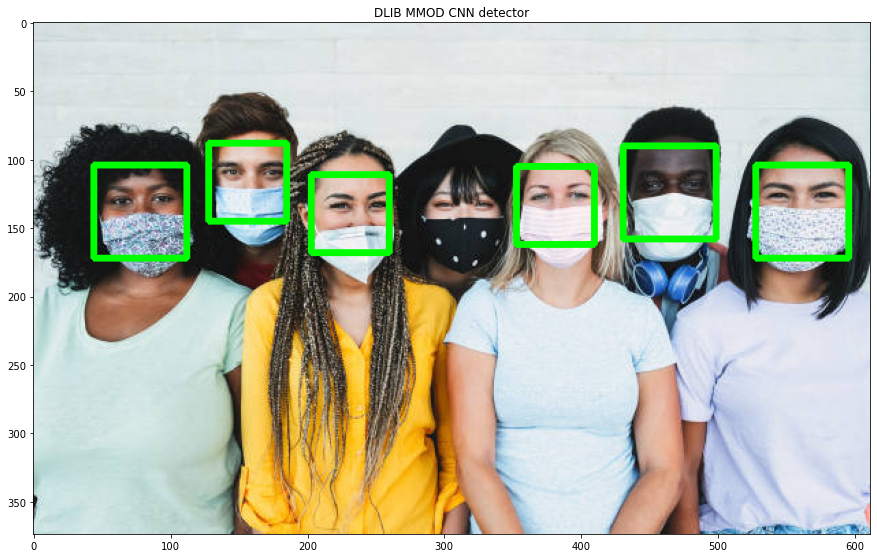

In [33]:
detector_cnn = dlib.cnn_face_detection_model_v1('data/mmod_human_face_detector.dat');

start = time.time();
rects_cnn = detector_cnn(gray, 1);
end = time.time();

print('Number of detected faces by CNN algorithm:', len(rects_cnn))
print("CNN face detection time {:.4f} seconds".format(end - start))


result_dlib_cnn = np.copy(img)
faces_dlib_img_cnn = []
for rect in rects_cnn:    
    # Draw rectangle around the face
    x, y, w, h = rect_to_bb(rect.rect)
    cv2.rectangle(result_dlib_cnn, (x, y), (x+w, y+h), (0, 255, 0), 3)
    faces_dlib_img_cnn.append(img[y:y+h, x:x+w, :])
    
    
plt.imshow(result_dlib_cnn), plt.title('DLIB MMOD CNN detector')

## Faces in the mask conclusions

To my surprise, the faces in the mask is also detected with good result. As usually the CNN detector is lot better. 
